# Day 4: Pandas

In [194]:
# Read CSV file of Value of Energy Cost Saving Program for Businesses in NY City

In [195]:
import pandas as pd

df = pd.read_csv('Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_-_FY2020.csv')

In [196]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 26 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Company Name                               450 non-null    object 
 1   company contact                            450 non-null    object 
 2   company email                              433 non-null    object 
 3   company phone                              450 non-null    object 
 4   Address                                    450 non-null    object 
 5   City                                       450 non-null    object 
 6   State                                      450 non-null    object 
 7   Postcode                                   450 non-null    int64  
 8   Industry                                   450 non-null    object 
 9   Industry descr                             434 non-null    object 
 10  Company Type              

In [197]:
print(df.head())

                               Company Name    company contact  \
0                            1 State Street      David Neiburg   
1                            100 Church LLC  Edward A. Carroll   
2                      100 Wall Investments       Jerry Branam   
3               1-10 Bush Terminal Owner LP     Andrew Kimball   
4  120 Broadway Acquisitions JV, LLC (Ldmk)        Carl Letich   

               company email company phone                Address      City  \
0     eskoblo@energyspec.com    7186779077          1114 Avenue J  Brooklyn   
1                        NaN    2125663000      100 Church Street        NY   
2                        NaN    2122487160         96 Wall Street  New York   
3  akimball@industrycity.com    3474178429  220 36th St, Suite 2A  Brooklyn   
4      clettich@silvprop.com    2124064020           120 Broadway  New York   

  State  Postcode    Industry  \
0    NY     11230  Commercial   
1    NY     10007  Commercial   
2    NY     10005    Landlord

### 1. How many different companies are represented in the data set?

In [198]:
num_of_companies = len((df['Company Name'].drop_duplicates()))
print(num_of_companies)

439


### 2. What is the total number of jobs created for businesses in Queens?

In [199]:
num_of_jobs_created_in_queens = df[df['City']=='Queens']['Job created'].sum()
print(num_of_jobs_created_in_queens)

90.0


### 3. How many different unique email domains names are there in the data set?

In [200]:
num_of_unique_email_domains = df['company email'].dropna().str.split('@',expand=True)[1].nunique()
print(num_of_unique_email_domains)

356


### 4. Considering only NTAs with at least 5 listed businesses, what is the average total savings and the total jobs created for each NTA?

In [201]:

sub_dict = df.groupby("NTA")["Company Name"].apply(list).to_dict()

for key, value in sub_dict.items():
    sub_dict[key] = list(set(value))

NTA_greater_than_5 = []

for key, value in sub_dict.items():
    if len(value) >= 5:
        NTA_greater_than_5.append(key)
        
total_savings = df[df['NTA'].isin(NTA_greater_than_5)]

Total_savings_avg = total_savings.groupby('NTA')['Total Savings'].mean().to_frame().sort_values(by=['NTA'])

Total_jobs_created_avg = total_savings.groupby('NTA')['Job created'].mean().to_frame().sort_values(by=['NTA'])

print(Total_savings_avg)

print(Total_jobs_created_avg)


                                                  Total Savings
NTA                                                            
Battery Park City-Lower Manhattan                 469890.796667
Bushwick South                                     26140.455000
Carroll Gardens-Columbia Street-Red Hook           24337.390000
College Point                                      17159.372857
Crown Heights North                                 4036.298889
DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill   59950.340000
East New York                                      48433.093333
East Williamsburg                                  13990.626364
Greenpoint                                          9753.649286
Hunters Point-Sunnyside-West Maspeth               23931.398933
Hunts Point                                        39246.016154
Manhattanville                                      2760.888889
Maspeth                                             6658.283333
Mott Haven-Port Morris                  

### 5. Save your result for the previous question as a CSV file.

In [202]:
final_df = pd.merge(Total_savings_avg,Total_jobs_created_avg,on=['NTA'])

print(final_df)

                                                  Total Savings  Job created
NTA                                                                         
Battery Park City-Lower Manhattan                 469890.796667          NaN
Bushwick South                                     26140.455000    10.000000
Carroll Gardens-Columbia Street-Red Hook           24337.390000          NaN
College Point                                      17159.372857     2.000000
Crown Heights North                                 4036.298889          NaN
DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill   59950.340000          NaN
East New York                                      48433.093333    15.000000
East Williamsburg                                  13990.626364          NaN
Greenpoint                                          9753.649286          NaN
Hunters Point-Sunnyside-West Maspeth               23931.398933          NaN
Hunts Point                                        39246.016154    12.000000

In [203]:
final_df.to_csv('Day_4_HW.csv')

# Day 5: Plotting

### 1. scatter plot of jobs created versus average savings. Use both a standard and a logarithmic scale for the average savings.

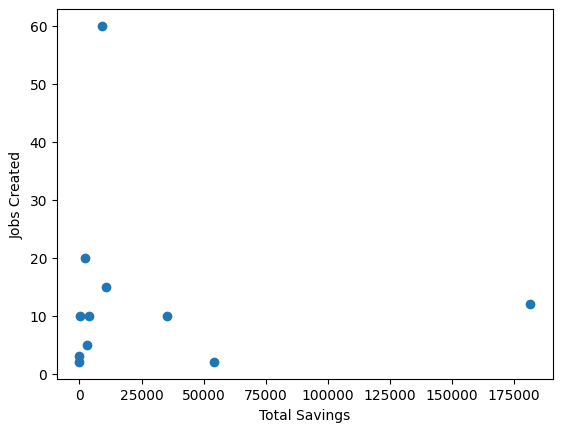

In [213]:
import matplotlib.pyplot as plt

plt.scatter(df['Total Savings'],df['Job created'])
plt.xlabel('Total Savings')
plt.ylabel('Jobs Created')
plt.show()

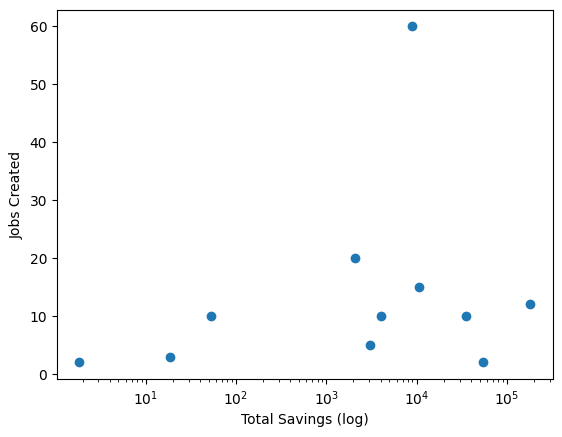

In [214]:
plt.scatter(df['Total Savings'],df['Job created'])
plt.xlabel('Total Savings (log)')
plt.ylabel('Jobs Created')
plt.xscale('log')

plt.show()

### 2. histogram of the log of the average total savings.

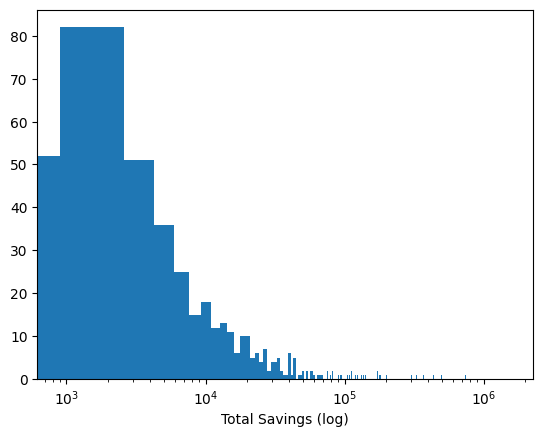

In [218]:
plt.hist(df['Total Savings'], bins=1000)
plt.xlabel('Total Savings (log)')
plt.xscale('log')
plt.show()

### 3. line plot of the total jobs created for each month.

    Effective Date  Job created
120     02/03/2005         12.0
414     02/05/1993         15.0
137     03/01/2006         10.0
29      03/05/2004         10.0
353     04/10/2007          2.0
325     05/02/2007          2.0
432     06/08/2007          3.0
37      06/28/2007         60.0
433     07/02/2007         20.0
95      11/06/2007          5.0
445     12/09/2008         10.0


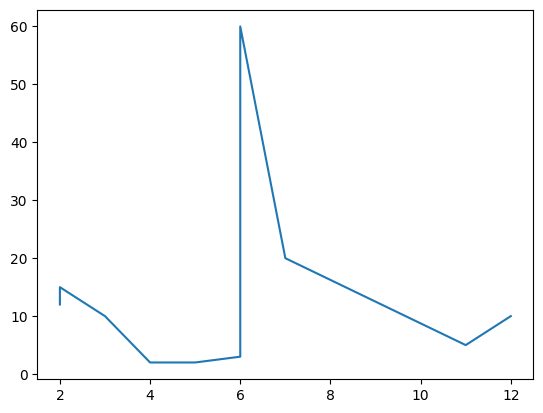

In [262]:
sub_df = df[df.index.isin(df['Job created'].dropna().to_frame().index)][['Effective Date','Job created']].sort_values(by=['Effective Date'])

print(sub_df)

x = pd.DatetimeIndex(sub_df['Effective Date']).month
y = sub_df['Job created']

plt.plot(x,y)

plt.show()